Data Reading and Feature Generation are handled inside data_load.py file. Refer to that file for details.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sys
import warnings
warnings.filterwarnings("ignore")
sys.path.append('../scripts')

In [2]:
from data_load import data_reading
from data_load import feature_generation

In [3]:
train_df, test_df = data_reading()

Generated Features

> **Total Acidity:** Sum of fixed acidity and volatile acidity. It represents the overall acidity level of the wine.

> **Fixed Acidity Ratio:** Ratio of fixed acidity to total acidity. This can be used instead of two variables since the volatile acidity ratio will be 1-fixed acidity ratio. 

> **Sugar-to-Acidity Ratio:** Ratio of residual sugar to total acidity. It provides an indication of the balance between sweetness and acidity.

> **Free sulfur dioxide-to-total sulfur dioxide ratio:** Ratio of free sulfur dioxide to total sulfur dioxide. It can indicate the proportion of active sulfur dioxide in the wine.

> **Alcohol content multiplied by pH:** Multiplying alcohol and pH values can capture potential interactions between these two factors.

*Refer to data_load.py for details*

In [4]:
train_df_new = feature_generation(train_df)
test_df_new = feature_generation(test_df)

Univariate Analysis

In [5]:
pd.set_option('display.max_columns', None)
train_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,total_acidity,fixed_acidity_volatile_acidity_r,fixed_acidity_volatile_acidity_m,fixed_acidity_citric_acid_r,fixed_acidity_citric_acid_m,fixed_acidity_residual_sugar_r,fixed_acidity_residual_sugar_m,fixed_acidity_chlorides_r,fixed_acidity_chlorides_m,fixed_acidity_free_sulfur_dioxide_r,fixed_acidity_free_sulfur_dioxide_m,fixed_acidity_total_sulfur_dioxide_r,fixed_acidity_total_sulfur_dioxide_m,fixed_acidity_density_r,fixed_acidity_density_m,fixed_acidity_pH_r,fixed_acidity_pH_m,fixed_acidity_sulphates_r,fixed_acidity_sulphates_m,fixed_acidity_alcohol_r,fixed_acidity_alcohol_m,fixed_acidity_total_acidity_r,fixed_acidity_total_acidity_m,volatile_acidity_citric_acid_r,volatile_acidity_citric_acid_m,volatile_acidity_residual_sugar_r,volatile_acidity_residual_sugar_m,volatile_acidity_chlorides_r,volatile_acidity_chlorides_m,volatile_acidity_free_sulfur_dioxide_r,volatile_acidity_free_sulfur_dioxide_m,volatile_acidity_total_sulfur_dioxide_r,volatile_acidity_total_sulfur_dioxide_m,volatile_acidity_density_r,volatile_acidity_density_m,volatile_acidity_pH_r,volatile_acidity_pH_m,volatile_acidity_sulphates_r,volatile_acidity_sulphates_m,volatile_acidity_alcohol_r,volatile_acidity_alcohol_m,volatile_acidity_total_acidity_r,volatile_acidity_total_acidity_m,citric_acid_residual_sugar_r,citric_acid_residual_sugar_m,citric_acid_chlorides_r,citric_acid_chlorides_m,citric_acid_free_sulfur_dioxide_r,citric_acid_free_sulfur_dioxide_m,citric_acid_total_sulfur_dioxide_r,citric_acid_total_sulfur_dioxide_m,citric_acid_density_r,citric_acid_density_m,citric_acid_pH_r,citric_acid_pH_m,citric_acid_sulphates_r,citric_acid_sulphates_m,citric_acid_alcohol_r,citric_acid_alcohol_m,citric_acid_total_acidity_r,citric_acid_total_acidity_m,residual_sugar_chlorides_r,residual_sugar_chlorides_m,residual_sugar_free_sulfur_dioxide_r,residual_sugar_free_sulfur_dioxide_m,residual_sugar_total_sulfur_dioxide_r,residual_sugar_total_sulfur_dioxide_m,residual_sugar_density_r,residual_sugar_density_m,residual_sugar_pH_r,residual_sugar_pH_m,residual_sugar_sulphates_r,residual_sugar_sulphates_m,residual_sugar_alcohol_r,residual_sugar_alcohol_m,residual_sugar_total_acidity_r,residual_sugar_total_acidity_m,chlorides_free_sulfur_dioxide_r,chlorides_free_sulfur_dioxide_m,chlorides_total_sulfur_dioxide_r,chlorides_total_sulfur_dioxide_m,chlorides_density_r,chlorides_density_m,chlorides_pH_r,chlorides_pH_m,chlorides_sulphates_r,chlorides_sulphates_m,chlorides_alcohol_r,chlorides_alcohol_m,chlorides_total_acidity_r,chlorides_total_acidity_m,free_sulfur_dioxide_total_sulfur_dioxide_r,free_sulfur_dioxide_total_sulfur_dioxide_m,free_sulfur_dioxide_density_r,free_sulfur_dioxide_density_m,free_sulfur_dioxide_pH_r,free_sulfur_dioxide_pH_m,free_sulfur_dioxide_sulphates_r,free_sulfur_dioxide_sulphates_m,free_sulfur_dioxide_alcohol_r,free_sulfur_dioxide_alcohol_m,free_sulfur_dioxide_total_acidity_r,free_sulfur_dioxide_total_acidity_m,total_sulfur_dioxide_density_r,total_sulfur_dioxide_density_m,total_sulfur_dioxide_pH_r,total_sulfur_dioxide_pH_m,total_sulfur_dioxide_sulphates_r,total_sulfur_dioxide_sulphates_m,total_sulfur_dioxide_alcohol_r,total_sulfur_dioxide_alcohol_m,total_sulfur_dioxide_total_acidity_r,total_sulfur_dioxide_total_acidity_m,density_pH_r,density_pH_m,density_sulphates_r,density_sulphates_m,density_alcohol_r,density_alcohol_m,density_total_acidity_r,density_total_acidity_m,pH_sulphates_r,pH_sulphates_m,pH_alcohol_r,pH_alcohol_m,pH_total_acidity_r,pH_total_acidity_m,sulphates_alcohol_r,sulphates_alcohol_m,sulphates_total_acidity_r,sulphates_total_acidity_m,alcohol_total_acidity_r,alcohol_total_acidity_m,molecularso2,alcohol_density_r_totalacidity_r,total_acidity_sulphates_p,density_alcohol_r_sulphates_chlorides_r,total_acidity_alcohol_r+sulphates*alcohol+total_acidity
0,8.0,0.50,0.39,2.2,0.073,30.0,39.0,0.99572,3.33,0.77,12.1,6,8.

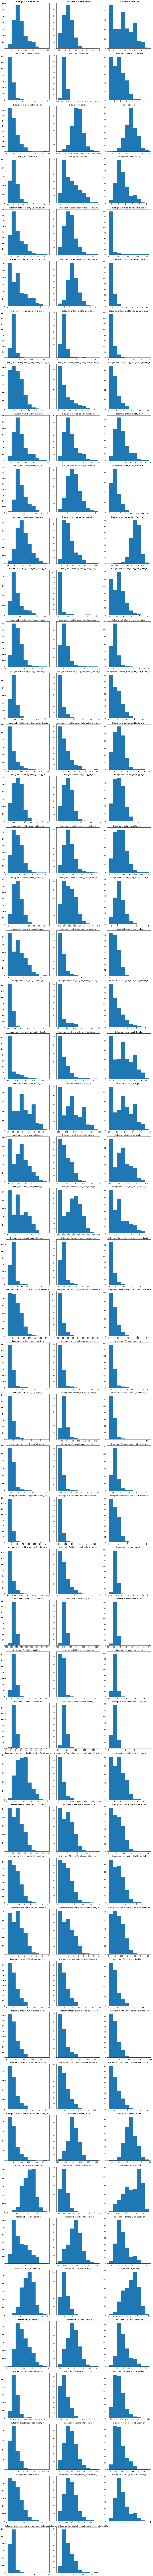

In [6]:
columns_to_plot = [col for col in train_df.columns if col not in ['quality']]

num_cols = 3
if len(columns_to_plot) % 3 == 0:
    num_rows = len(columns_to_plot) // 3
else:
    num_rows = len(columns_to_plot) // 3 + 1


fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, num_rows*5))
axs = axs.flatten()

for i, column in enumerate(columns_to_plot):
    axs[i].hist(train_df[column])
    axs[i].set_title(f'Histogram of {column}')

if len(columns_to_plot) < num_rows * num_cols:
    for j in range(len(columns_to_plot), num_rows * num_cols):
        fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

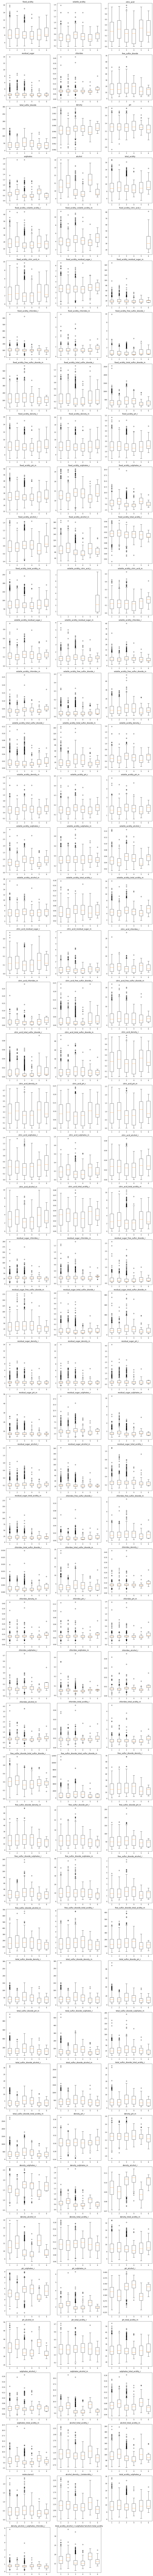

In [7]:
columns_to_plot = [col for col in train_df.columns if col not in ['quality']]

num_cols = 3
if len(columns_to_plot) % 3 == 0:
    num_rows = len(columns_to_plot) // 3
else:
    num_rows = len(columns_to_plot) // 3 + 1

fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
axs = axs.flatten()

for i, column in enumerate(columns_to_plot):
    ax = axs[i]
    ax.boxplot([train_df[column][train_df['quality'] == q] for q in train_df['quality'].unique()])
    ax.set_title(column)

if len(columns_to_plot) < num_rows * 3:
    for j in range(len(columns_to_plot), num_rows * 3):
        fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

Correlation Analysis

In [8]:
correlations = train_df.corr(method='spearman')['quality'].drop('quality').sort_values(ascending=False)
print(correlations)

sulphates_alcohol_m             0.550261
density_alcohol_m               0.504278
alcohol                         0.504246
sulphates                       0.456985
density_sulphates_m             0.451882
                                  ...   
volatile_acidity_sulphates_r   -0.373707
pH_sulphates_r                 -0.438841
density_sulphates_r            -0.461647
pH_alcohol_r                   -0.471765
density_alcohol_r              -0.503039
Name: quality, Length: 149, dtype: float64
